<a href="https://colab.research.google.com/github/nikhil2020/Phishing-Detector-Project/blob/master/Phishing_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [ ]:
import os
os.chdir("/content/drive/My Drive/Datasets/Phising_detector")

In [ ]:
data = pd.read_csv('phishing.txt',header =None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data.shape

(11055, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11055 non-null  int64
 1   1       11055 non-null  int64
 2   2       11055 non-null  int64
 3   3       11055 non-null  int64
 4   4       11055 non-null  int64
 5   5       11055 non-null  int64
 6   6       11055 non-null  int64
 7   7       11055 non-null  int64
 8   8       11055 non-null  int64
 9   9       11055 non-null  int64
 10  10      11055 non-null  int64
 11  11      11055 non-null  int64
 12  12      11055 non-null  int64
 13  13      11055 non-null  int64
 14  14      11055 non-null  int64
 15  15      11055 non-null  int64
 16  16      11055 non-null  int64
 17  17      11055 non-null  int64
 18  18      11055 non-null  int64
 19  19      11055 non-null  int64
 20  20      11055 non-null  int64
 21  21      11055 non-null  int64
 22  22      11055 non-null  int64
 23  23      110

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.columns = ['having_IP_Address','URL_length','Shortining_Service','having_At_Symbol',
              'double_slash_redirecting','Prefix_suffix','having_Sub_Domain','SSLfinal_State','Domain_registration_length',
               'Favion','Port','HTTPS_token','Request_URL','URL_of_Anchor','Links_in_tags','SFH',
               'Submitting_to_email','Abnormal_URL','Redirect','on_movesover','RightClick','PopUpwindow','IFrame',
                'age_of_domain','DNSRecord','web_traffic','Page_Rank','Google_Index',
                'Links_pointing_to_page','Statistical_Report','Result']
        

In [ ]:
data.head()

,having_IP_Address,URL_length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_suffix,having_Sub_Domain,SSLfinal_State,Domain_registration_length,Favion,Port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_movesover,RightClick,PopUpwindow,IFrame,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_Report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
data.columns

Index(['having_IP_Address', 'URL_length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registration_length',
       'Favion', 'Port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_movesover', 'RightClick', 'PopUpwindow', 'IFrame',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_Report',
       'Result'],
      dtype='object')

In [ ]:
data.corr()

,having_IP_Address,URL_length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_suffix,having_Sub_Domain,SSLfinal_State,Domain_registration_length,Favion,Port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_movesover,RightClick,PopUpwindow,IFrame,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_Report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favion,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,0.803834,0.049483,-0.004620,0.037698,-0.100341,-0.012279,0.668317,0.071848,-0.015621,0.706179,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


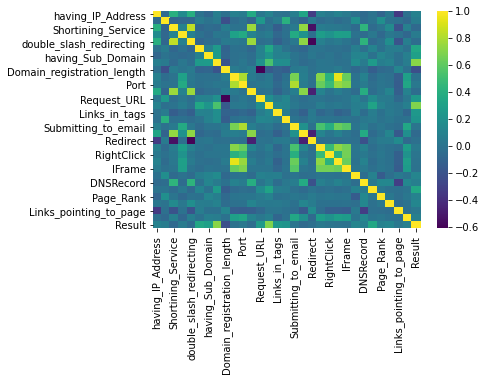

In [ ]:
sns.heatmap(data.corr(),cmap ='viridis',linecolor = 'black')

In [ ]:
X = data.iloc[:,0:30].values

In [ ]:
X.shape

(11055, 30)

In [ ]:
y = data.loc[:,['Result']].values

In [ ]:
y.shape

(11055, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30,random_state =1)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7738, 30)
(3317, 30)
(7738, 1)
(3317, 1)


In [ ]:
# Importing the classifier from linear model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


In [ ]:
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
# applying grid search to find best performing parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.001,0.01,0.1,1,10,100,1000],
               'penalty':['l1','l2']
              }]
grid_search = GridSearchCV(classifier,parameters,cv=5,n_jobs =-1)
grid_search.fit(X_train,y_train)
# Printing best parameters
print('Best Accuracy =',(grid_search.best_score_))
print('Best parameters = ',(grid_search.best_params_))

Best Accuracy = 0.9280177187153932
Best parameters =  {'C': 0.1, 'penalty': 'l2'}


In [ ]:
# Instantiate the classifier Logistic Regression
classifier = LogisticRegression(C=0.1,penalty ='l2')


In [ ]:
# Fitting the classifier or model on training dataset to train
classifier.fit(X_train,y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the values on test dataset
y_pred = classifier.predict(X_test)

In [ ]:
# Confusion matrix for the LR classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1341,  149],
       [  93, 1734]])

In [ ]:

TP = cm[0][0]
print('True Postive  = ',TP)
FP = cm[0][1]
print('False Postive = ',FP)
FN = cm[1][0]
print('False Negative = ',FN)
TN = cm[1][1]
print('True Negative = ',TN)


True Postive  =  1341
False Postive =  149
False Negative =  93
True Negative =  1734


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print ('The Accuracy of the LR model : ',round(accuracy*100,ndigits =2),'%')



The Accuracy of the LR model :  92.7 %


In [ ]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =700,
                                   criterion ='entropy',
                                   max_features ='sqrt',
                                   random_state=0)

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1422,   68],
       [  35, 1792]])

In [ ]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy


0.968947844437745

In [ ]:
# XGBoost Model
get_ipython().run_line_magic('time', '')
# Importing the XGBoost model from scikit learn ensemble 
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimator =1000)
classifier.fit(X_train,y_train)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=1000,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
# Predicting the values on independent variables testing dataset
y_pred = classifier.predict(X_test)

In [ ]:
# Confusion matrix for evaluation to get the accuracy of the XGBoost model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1370,  120],
       [  56, 1771]])

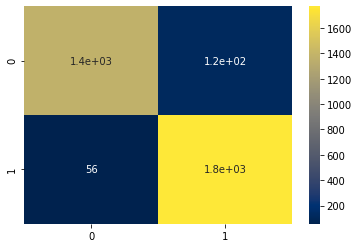

In [ ]:
sns.heatmap(cm,annot = True,cmap="cividis")

In [ ]:
# Accuracy of the XGBoost model is base on Actual values and predicting values by the model
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9469400060295448

# The Champion Model out of LR,RF and XGBoost is Random Forest of accuracy 96%


## Exercies 2

- Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
- Check accuracy using the test data and compare the accuracy with the previous value.


In [ ]:
X1 = data.loc[:,['Prefix_suffix','URL_of_Anchor']].values

In [ ]:
y1 = data.loc[:,['Result']].values

In [ ]:
X = pd.DataFrame(X1)

In [ ]:
y = pd.DataFrame(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11055 non-null  int64
 1   1       11055 non-null  int64
dtypes: int64(2)
memory usage: 172.9 KB


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
1,11055.0,-0.076526,0.715138,-1.0,-1.0,0.0,0.0,1.0


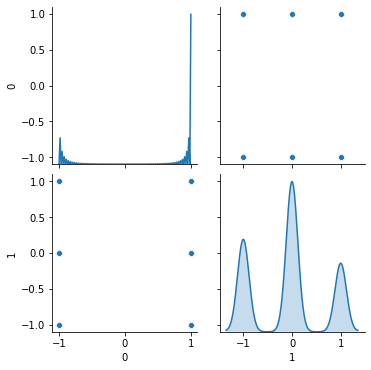

In [ ]:
sns.pairplot(X,diag_kind = 'kde')

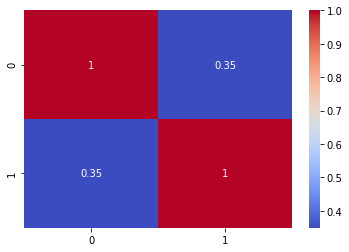

In [ ]:
sns.heatmap(X.corr(),cmap = 'coolwarm',annot =True)

In [ ]:
# Importing the train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size =0.30,random_state =1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7738, 2)
(3317, 2)
(7738, 1)
(3317, 1)


In [ ]:
# Logistic Regression Model
# Importing the classifier from linear model 
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instantiate the classifier Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the values on independent variables testing dataset
y_pred = classifier.predict(X_test)

In [ ]:
# Confusion matrix for evaluation to get the accuracy of the XGBoost model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 996,  494],
       [   3, 1824]])

In [ ]:
TP = cm[0][0]
print('True Postive  = ',TP)
FP = cm[0][1]
print('False Postive = ',FP)
FN = cm[1][0]
print('False Negative = ',FN)
TN = cm[1][1]
print('True Negative = ',TN)

True Postive  =  996
False Postive =  494
False Negative =  3
True Negative =  1824


In [ ]:
# Accuracy of the XGBoost model is base on Actual values and predicting values by the model
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.8501658124811576

In [ ]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =700,
                                   criterion ='entropy',
                                   max_features ='sqrt',
                                   random_state=0)


In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the values on independent variables testing dataset
y_predrf = classifier.predict(X_test)

In [ ]:
# Confusion matrix for evaluation to get the accuracy of the XGBoost model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predrf)
cm

array([[ 996,  494],
       [   3, 1824]])

In [ ]:
TP = cm[0][0]
print('True Postive  = ',TP)
FP = cm[0][1]
print('False Postive = ',FP)
FN = cm[1][0]
print('False Negative = ',FN)
TN = cm[1][1]
print('True Negative = ',TN)

True Postive  =  996
False Postive =  494
False Negative =  3
True Negative =  1824


In [ ]:
# Accuracy of the XGBoost model is base on Actual values and predicting values by the model
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test,y_predrf)
model_accuracy

0.8501658124811576

In [ ]:
# XGBoost Model
get_ipython().run_line_magic('time', '')
# Importing the XGBoost model from scikit learn ensemble 
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimator =1000)
classifier.fit(X_train,y_train)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=1000,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
# Predicting the values on independent variables testing dataset
y_pred1 = classifier.predict(X_test)

In [ ]:
# Confusion matrix for evaluation to get the accuracy of the XGBoost model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred1)
cm

array([[ 996,  494],
       [   3, 1824]])

In [ ]:
# Accuracy of the XGBoost model is base on Actual values and predicting values by the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.8501658124811576